# Week 9 Study Notebook

# UC San Diego OMDS DSC 207

## Assignment Instructions-
1. You may use any visualization tool - seaborn/matplotlib for a task
2. Sample outputs are provided but your output may vary based on choice of library and parameters.
3. Use the mandatory parameter values wherever specified

Note: Currently, there is an autograder configured for the week 9 assignment on Gradescope. Please feel free to ignore this as we will be grading the entire assignment manually.

# Natural Language Processing with `nltk`

`nltk` is the most popular Python package for Natural Language processing, it provides algorithms for importing, cleaning, pre-processing text data in human language and then apply computational linguistics algorithms like sentiment analysis.

It also includes many easy-to-use datasets in the `nltk.corpus` package, we can download for example the `movie_reviews` package using the `nltk.download` function:

## Inspect the Movie Reviews Dataset

In [114]:
# Uncomment the below line and run this cell if you need to install nltk
#!pip install nltk

In [115]:
#Run this cell for all the imports
import pandas as pd
import numpy as np
import nltk

In [116]:
# Import the sentiment intensity analyzer
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [117]:
#Run this cell to download the dataset
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/scotty/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

You can also list and download other datasets interactively, just type:

`nltk.download()`
    
in the Jupyter Notebook.

In [118]:
#Run this cell to import the dataset
from nltk.corpus import movie_reviews

In [119]:
#Run this cell for later use in tokenization
nltk.download('vader_lexicon')  # for sentiment analysis
nltk.download('punkt_tab')  # for tokenizing

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/scotty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/scotty/nltk_data...


[nltk_data]   Package punkt_tab is already up-to-date!


True

## 1. Tokenize Text in Words

In [120]:
#Run this cell
romeo_text = """Why then, O brawling love! O loving hate!
O any thing, of nothing first create!
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!
This love feel I, that feel no love in this."""

The first step in Natural Language processing is generally to split the text into words, this process might appear simple but it is very tedious to handle all corner cases, see for example all the issues with punctuation we have to solve if we just start with a split on whitespace.

1.1 **Split `romeo_text` by spaces and store the resultant list of words in the variable `romeo_tokens`** [0.5 pt]

In [121]:
# split with no args will split string by whitespace
romeo_tokens = romeo_text.split()


In [122]:
assert type(romeo_tokens) == list
assert len(romeo_tokens) == 52

`nltk` has a sophisticated word tokenizer trained on English named `punkt` which we imported earlier in the notebook.

1.2  **Use the `nltk.word_tokenize(text)` function to properly tokenize `romeo_text` and stores the result as `romeo_words`. Print the resultant list.** Compare it to the whitespace splitting we used above and mention the difference. [0.5 pt]

In [123]:
romeo_words = nltk.word_tokenize(romeo_text)

In [124]:
assert type(romeo_words) == list
assert len(romeo_words) == 68

## 2. Build a bag-of-words model

The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be `True` or `False`.
We implement this in Python as a dictionary where for each word in a sentence we associate `True`.

2.1 **Write a function `build_bag_of_words(words)` that returns such a dictionary with {word : True} format given a set of words. Call the function with `romeo_words` and store the resultant dictionary as `romeo_word_dict`.** [1 pt]

In [125]:
def build_bag_of_words_features(words):
    romeo_word_dict = {i:True for i in romeo_words }
    return(romeo_word_dict)

romeo_word_dict = build_bag_of_words_features(romeo_words)

In [126]:
# Sanity check
assert type(build_bag_of_words_features(romeo_words)) == dict
assert sum(value for value in romeo_word_dict.values() if value) == 45


This is what we wanted, but we notice that also punctuation like "!" and words useless for classification purposes like "of" or "that" are also included.
Those words are named "stopwords" and `nltk` has a convenient corpus we can download:

In [127]:
#Run this cell
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/scotty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
#Run this cell
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Using the Python `string.punctuation` list and the English stopwords we can build better features by filtering out those words that would not help in the classification.

2.2 **Create a list `useless_words` that is a collection of stopwords (from the nltk corpus) in english and the punctuation characters.** [0.5 pt]

In [129]:
from nltk.corpus import stopwords
useless_words = list(stopwords.words('english')) + list(string.punctuation)


In [130]:
assert type(useless_words) == list
#assert len(useless_words) == 211
# len of useless_words should be 230
assert len(useless_words) == 230

2.3 **Write a function `build_bag_of_words_features_filtered(words)` that returns a filtered bag of words - a dictionary with only useful words as key and 1 as the value. Call this function with `romeo_words` and store the resultant dictionary as `romeo_useful_word_dict`. (Note: don't convert the words to lowercase before checking if they are a stop word.)** [1 pt]

In [131]:

def build_bag_of_words_features_filtered(words):
    romeo_useful_word_dict = {word:1 for word in words if word not in useless_words}
    return romeo_useful_word_dict

romeo_useful_word_dict = build_bag_of_words_features_filtered(romeo_words)


In [132]:
# Sanity check
assert type(build_bag_of_words_features_filtered(romeo_words)) == dict
assert len(romeo_useful_word_dict) == 31

## 3. Frequencies of Words

It is common to explore a dataset before starting the analysis, in this section we will find the most common words and plot their frequency.

3.1. Using the `movie_reviews.words()` (the nltk corpus we imported previously) with no argument we can extract the words from the entire dataset as `all_words` and check that it is about 1.6 millions. [0.5 pt]

In [133]:
from nltk.corpus import movie_reviews
all_words = movie_reviews.words()

3.2. Filter out `useless_words` as defined in the previous section, and create a new list `filtered_words` this will reduce the length of the dataset by more than a factor of 2. (Hint - Use python list comprehension) [0.5 pt]

In [134]:

filtered_words = [word for word in all_words if word not in useless_words]

In [135]:
assert type(filtered_words) == list

The `collection` package of the standard library contains a `Counter` class that is handy for counting frequencies of words in our list:

In [136]:
# Run this cell
from collections import Counter
word_counter = Counter(filtered_words)


3.3 It also has a [most_common() ](https://pythontic.com/containers/counter/most_common) method of the word_counter and store the top 10 used words from the corpus in `most_common_words`. [0.5 pt]?

In [137]:

most_common_words = word_counter.most_common(n=10)

In [138]:
assert type(most_common_words) == list
assert len(most_common_words) == 10

<!-- BEGIN QUESTION -->

## 4. Sentiment Analysis [2 pt]

Using the sentiment intensity analyzer, loop over the `list_sentences` and print the polarity scores of each of the sentence. (Hint - refer to lecture notebook)

In [ ]:
import nltk.sentiment

list_sentences = ["Hello, how are you?", "Today is a nice day", "I don't like the food at the cafe", "This is the worst pizza I have ever had.", "The orange juice is delicious!", "I am late to class." ]

# create sentiment analyzer objects
# one for vader and nltk to see differences
sia_vader = SentimentIntensityAnalyzer()
sia_nltk = nltk.sentiment.SentimentIntensityAnalyzer()
plot_data = []

#print and build plot data
for sent in list_sentences:
    
    polarity_score = sia_vader.polarity_scores(sent)
    print(f"vader->{sent:-<55} {polarity_score}")
    for i,j in polarity_score.items():
        polarity_data = {}
        polarity_data['method'] = 'vader'
        polarity_data['sentence'] = sent
        polarity_data['polarity_type'] = i
        polarity_data['polarity_score'] = j
        plot_data.append(polarity_data)
    
    polarity_score = sia_nltk.polarity_scores(sent)
    print(f" nltk->{sent:-<55} {polarity_score}\n")
    for i,j in polarity_score.items():
        polarity_data = {}
        polarity_data['method'] = 'nltk'
        polarity_data['sentence'] = sent
        polarity_data['polarity_type'] = i
        polarity_data['polarity_score'] = j
        plot_data.append(polarity_data)



vader->Hello, how are you?------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 nltk->Hello, how are you?------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

vader->Today is a nice day------------------------------------ {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
 nltk->Today is a nice day------------------------------------ {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

vader->I don't like the food at the cafe---------------------- {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2755}
 nltk->I don't like the food at the cafe---------------------- {'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compound': -0.2755}

vader->This is the worst pizza I have ever had.--------------- {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249}
 nltk->This is the worst pizza I have ever had.--------------- {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

vader->The orang

### Visualize nltk and vader SentimentIntensityAnalyzer Differences

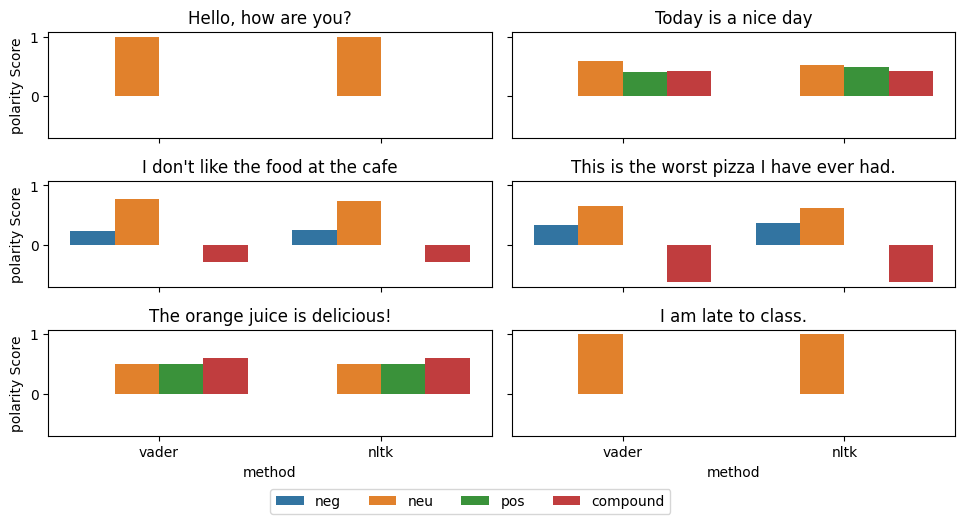

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(plot_data)

fig, ax = plt.subplots(3,2,sharey=True,sharex=True,figsize=(10,5))
ax = ax.flatten()
for i, col in enumerate(df.sentence.unique()):
    if i ==0:
        sns.barplot(y=df[df['sentence']==col]['polarity_score'], x=df[df['sentence']==col]['method'], hue=df['polarity_type'], ax=ax[i])
        ax[i].set_ylabel('polarity Score')
        ax[i].set_xlabel('method')
        ax[i].set_title(f'{col}',fontsize=12)
        handles, labels = ax[0].get_legend_handles_labels() 
        fig.legend(handles, labels,loc='upper center',bbox_to_anchor=(0.5, 0.025), ncol=4,frameon=True)
        ax[i].get_legend().remove()
        
    else:
        sns.barplot(legend=False, y=df[df['sentence']==col]['polarity_score'], x=df[df['sentence']==col]['method'], hue=df['polarity_type'], ax=ax[i])
        ax[i].set_ylabel('polarity Score')
        ax[i].set_xlabel('method')
        ax[i].set_title(f'{col}',fontsize=12)
    
fig.tight_layout()
